# Run VGG16 on selected 3 classes without tuning

In this part, we only loads 3 classes with most paintings in VGG16 and still without tuning, because we need to compare it with the other tuned versions.

Though this time we only run 20 epochs, we can still see there exists overfitting.

In [1]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8866674015826737595
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2264907776
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10400245706179158261
physical_device_desc: "device: 0, name: GeForce GTX 970M, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


In [3]:
import tensorflow.keras.backend as K
K.clear_session()

In [4]:
nrow = 200
ncol = 200
base_model = applications.VGG16(weights='imagenet', input_shape=(nrow,ncol,3), include_top=False)
model = Sequential()

for layer in base_model.layers:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 50, 50, 256)       295168    
__________

In [6]:
train_data_dir = './images_train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='categorical')

Found 1616 images belonging to 3 classes.


In [7]:
test_data_dir = './images_test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = train_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='categorical')

Found 402 images belonging to 3 classes.


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size

In [9]:
nepochs = 20  # Number of epochs

# Call the fit_generator function
hist = model.fit_generator(
    train_generator,
    epochs=nepochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_generator,
    validation_steps=validation_steps)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
51/51 [==============================] - 48s 951ms/step - loss: 0.7488 - acc: 0.6912 - val_loss: 0.5347 - val_acc: 0.7662
Epoch 2/20
51/51 [==============================] - 41s 803ms/step - loss: 0.4483 - acc: 0.8274 - val_loss: 0.4963 - val_acc: 0.8085
Epoch 3/20
51/51 [==============================] - 41s 801ms/step - loss: 0.3342 - acc: 0.8818 - val_loss: 0.5242 - val_acc: 0.8159
Epoch 4/20
51/51 [==============================] - 43s 848ms/step - loss: 0.3334 - acc: 0.8824 - val_loss: 0.4377 - val_acc: 0.8308
Epoch 5/20
51/51 [==============================] - 42s 832ms/step - loss: 0.2429 - acc: 0.9233 - val_loss: 0.4771 - val_acc: 0.8184
Epoch 6/20
51/51 [==============================] - 44s 864ms/step - loss: 0.2409 - acc: 0.9165 - val_loss: 0.5297 - val_acc: 0.7910
Epoch 7/20
51/51 [==============================] - 38s 750ms/step - loss: 0.2070 - acc: 0.9301 - val_loss: 0.4441 - val_acc: 0.8383
Epoch 8/20
51/51 [===

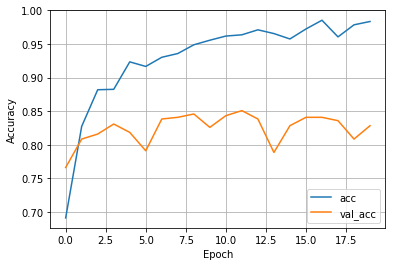

In [10]:
hist_his = hist.history
acc = hist_his['acc']
val_acc = hist_his['val_acc']
plt.plot(acc)
plt.plot(val_acc)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['acc','val_acc'], loc = 4)

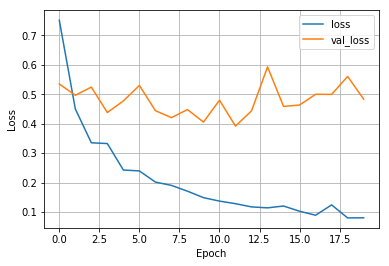

In [11]:
loss = hist_his['loss']
val_loss = hist_his['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'], loc = 1)

In [12]:
print(loss)
print(val_loss)
print(acc)
print(val_acc)

[0.7509350723559314, 0.4501491076875441, 0.33513500932419654, 0.3324616008465833, 0.24263272545125225, 0.23967051196216357, 0.20171235774708265, 0.19057435534968234, 0.1708688954315563, 0.14899897678653792, 0.13720300022770862, 0.12850487748585124, 0.11753369001026201, 0.11433112636060998, 0.12057178120801945, 0.10282738853504161, 0.08929582699985787, 0.12433314500468792, 0.08017670243314587, 0.08062718273832066]
[0.5346578520077926, 0.49634360120846677, 0.5241671640139359, 0.43771596596791196, 0.47711492157899416, 0.529675291134761, 0.44406301700151884, 0.4204594859710106, 0.4477960444413699, 0.4053718986419531, 0.4796006221037645, 0.3917713027734023, 0.44345738566838777, 0.5926056137451758, 0.45863019273831296, 0.46321375782673174, 0.4996836426166388, 0.4993331294793349, 0.5602593078063085, 0.4830422126329862]
[0.6912129, 0.8273515, 0.8818069, 0.8824257, 0.9232673, 0.9164604, 0.9300743, 0.93564355, 0.9486386, 0.9554455, 0.9616337, 0.9634901, 0.97091585, 0.9653465, 0.957302, 0.9721535